# Testing the Musical MDN Code

- Setup the system.

In [11]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import random
import numpy as np
import tensorflow as tf
import musical_mdn
import matplotlib.pyplot as plt
import pandas as pd

musical_mdn.MODEL_DIR = "/Users/charles/src/mdn-experiments/"
print(musical_mdn.MODEL_DIR)

/Users/charles/src/mdn-experiments/


## Training Test

In [ ]:
x_t_log = musical_mdn.generate_data()
loader = musical_mdn.SequenceDataLoader(num_steps = 121,batch_size = 100, corpus = x_t_log)
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_TRAIN, n_hidden_units = 128, n_mixtures = 10, batch_size = 100, sequence_length = 120)
losses = net.train(loader, 30, saving=True)
## Plot the losses.
plt.plot(losses)
plt.show()

Generating 50000 toy data samples.
                  t             x
count  50000.000000  50000.000000
mean       0.099998      0.002136
std        0.007057      5.047612
min        0.000100    -10.674405
25%        0.095274     -4.826945
50%        0.099998      0.016871
75%        0.104763      4.807713
max        0.128911     10.771951
Total training examples: 49878
Done initialising loader.
INFO:tensorflow:Loading Training Operations
INFO:tensorflow:done initialising: tiny-perf-mdn-3layers-128units vars: 336690
INFO:tensorflow:going to train: tiny-perf-mdn-3layers-128units
INFO:tensorflow:trained batch: 10 of 498; loss was 54254
INFO:tensorflow:trained batch: 20 of 498; loss was 44315
INFO:tensorflow:trained batch: 30 of 498; loss was 35938
INFO:tensorflow:trained batch: 40 of 498; loss was 28881
INFO:tensorflow:trained batch: 50 of 498; loss was 26673
INFO:tensorflow:trained batch: 60 of 498; loss was 24373


## Evaluation Test

Predict 10000 Datapoints and plot some segments.

In [8]:
## Evaluation Test:
## Predict 10000 Datapoints.
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_RUN, n_hidden_units = 128, n_mixtures = 10, batch_size = 1, sequence_length = 1)
first_touch = np.array([0.001,15.01]).reshape((1,1,2))
with tf.Session() as sess:
    perf = net.generate_performance(first_touch,10000,sess)

INFO:tensorflow:Loading Running Operations
INFO:tensorflow:done initialising: tiny-perf-mdn-3layers-128units vars: 336690
INFO:tensorflow:Restoring parameters from /Users/charles/src/mdn-experiments/tiny-perf-mdn-3layers-128units


NameError: name 'pd' is not defined

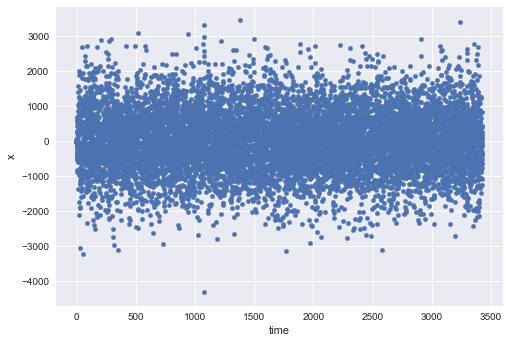

                  t             x          time
count  10001.000000  10001.000000  10001.000000
mean       0.342571     13.345793   1711.212881
std        0.054850    870.604629    989.029148
min       -1.264708  -4327.397461     -0.175556
25%        0.320781   -555.981750    853.280385
50%        0.352737     14.837479   1713.371807
75%        0.374777    573.255371   2562.917681
max        1.696242   3439.062500   3426.055070
Window: 1000 to 1100


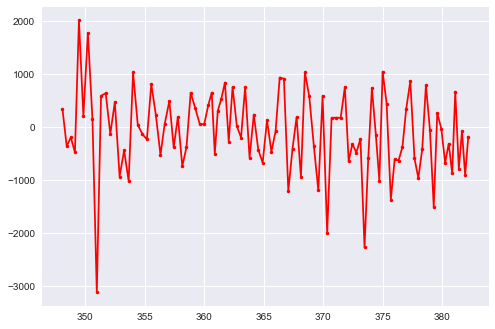

Window: 2000 to 2100


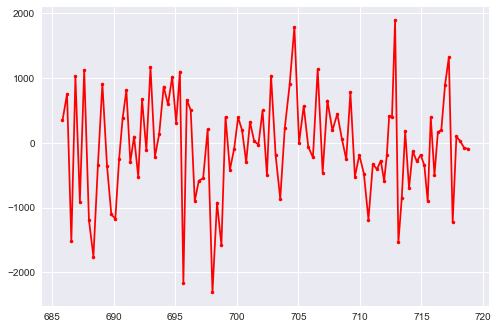

Window: 3000 to 3100


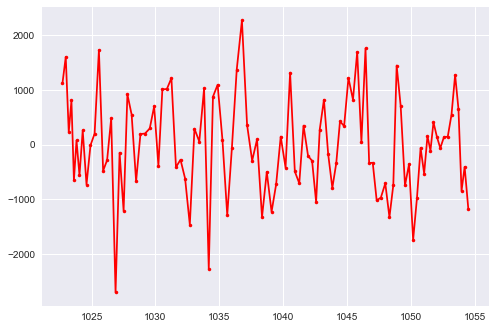

Window: 4000 to 4100


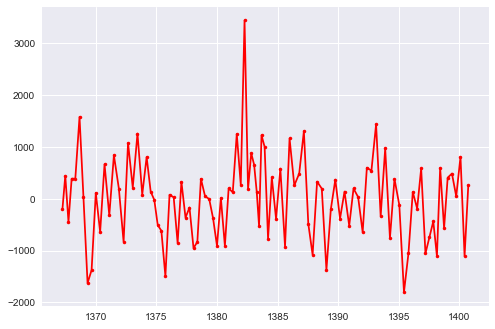

Window: 5000 to 5100


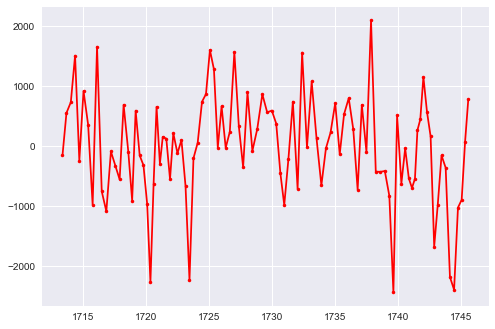

Window: 6000 to 6100


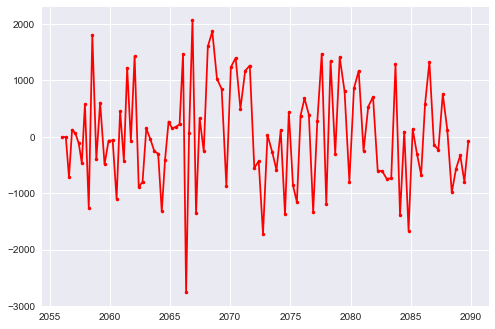

In [12]:
perf_df = pd.DataFrame({'t':perf.T[0], 'x':perf.T[1]})
perf_df['time'] = perf_df.t.cumsum()
plt.show(perf_df.plot('time','x',kind='scatter'))
print(perf_df.describe())
## Investigate Output
window = 100
for n in [1000,2000,3000,4000,5000,6000]:
    print("Window:", str(n),'to',str(n+window))
    plt.plot(perf_df[n:n+window].time, perf_df[n:n+window].x, '.r-')
    plt.show()